[참고원본사이트](https://www.datamanim.com/dataset/03_dataq/crawlingMain.html#)

### 다이아몬드 데이터셋

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/diamonds.csv',index_col=0)

## Question 1.
**carat과 price의 경향을 비교하기 위한 scatterplot그래프를 출력하시오**

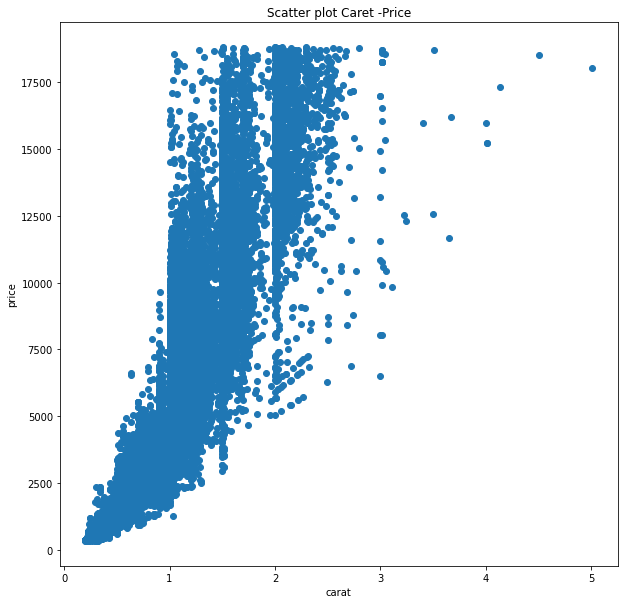

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
plt.scatter(df['carat'],df['price'])
plt.xlabel('carat')
plt.ylabel('price')
plt.title('Scatter plot Caret -Price')
plt.show()

## Question 2.
**carat과 price사이의 상관계수와 상관계수의 p-value값은?**


In [7]:
corr = df[['carat','price']].corr()


In [10]:
corr = corr.iloc[1,0]

0.9215913011934687

In [11]:
from scipy import stats



In [15]:
corr_by_scipy,pv = stats.pearsonr(df['carat'],df['price'])

In [ ]:
print(corr_by_scipy)

In [14]:
print(pv)

0.0


## Question 3.
**color에 따른 price 값의 분포는 아래와 같다.**


In [20]:
import seaborn as sns

<AxesSubplot:xlabel='color', ylabel='price'>

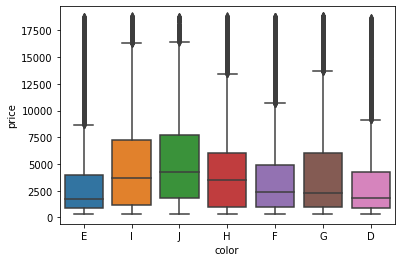

In [21]:
sns.boxplot(data=df, x='color', y='price')

## Question 3-1
**Diamond의 평균가격은 3932로 알려져있다. 'H' color를 가지는 다이아몬드 집단의 평균에 대한 일표본 t검정을 시행하려한다. 통계량과 pvalue값을 구하시오. 유의수준 0.05에서 귀무가설 채택여부를 boolean 값으로 표현할 변수(hypo) 만들고 출력하시오**

## 카이제곱 검정
 - p-value >= 0.05 : 귀무가설(부정적 진술: ~의 차이가 없다) 채택
 - p-value < 0.05 : 귀무가설 기각 / 대립가설(긍정적 진술: ~의 차이가 있다.) 채택

## 한 집단 평균 검정
- 하나의 데이터 집단의 평균과 비교하고자 하는 관측치를 통해 차이를 검정하는 방법이다.
- 데이터 집단의 평균과 거리가 멀 수록 p-value 유의수준의 값이 떨어진다.
- stats.ttest_1samp(비교집단, 관측치) 이용

In [25]:
from scipy import stats
H_prop = df[df['color']=='H']
static, pv = stats.ttest_1samp(H_prop['price'], 3932)
if pv < 0.05:
    hypo = False # 귀무가설 기각
else:
    hypo =True # 귀무가설 채택

In [26]:
print(static)
print(pv)
print(hypo)

11.988997411117696
7.569973305218302e-33
False


## Question 3-2
**그래프상에서 'F'와 'G'는 평균이 유사해보인다.이를 확인하기 위해 집단간 등분산(levene,fligner,bartlett) 검정을 시행 후 결과를 출력하고조건에 맞는 독립표본 t검정을 시행하라**


In [28]:
# 두 독립표본
F = df[df['color']=='F']
G = df[df['color']=='G']

leve = stats.levene(F['price'], G['price'])
fli = stats.fligner(F['price'], G['price'])
bartlet = stats.bartlett(F['price'], G['price'])

In [29]:
print(leve)
print(fli)
print(bartlet)


LeveneResult(statistic=53.627886257416655, pvalue=2.511093007074788e-13)
FlignerResult(statistic=37.04347553879807, pvalue=1.155244880009172e-09)
BartlettResult(statistic=47.52732212014331, pvalue=5.424264079257202e-12)


#### 등분산 조건 확인시 귀무가설 기각(p-value <0.05), 유의수준하에 'F와 G 집단간 분산은 같지 않다'

### 2) 두 집단 평균 검정
 - 두 데이터 집단간의 비교
 - stats.ttest_ind(x,y) 이용

In [30]:
t_test_FG =stats.ttest_ind(G['price'], F['price'], equal_var = False)


In [31]:
t_test_FG


Ttest_indResult(statistic=5.045279980436125, pvalue=4.567032122704146e-07)

독립표본 t검정 시행시 귀무가설 기각(p-value <0.05), 유의수준하에 'F와 G 집단간 평균은 같지 않다'
